In [1]:
import pandas
# data source = https://github.com/Institut-Zdravotnych-Analyz/covid19-data

In [2]:
data = pandas.read_csv('https://raw.githubusercontent.com/Institut-Zdravotnych-Analyz/covid19-data/main/DailyStats/OpenData_Slovakia_Covid_DailyStats.csv', sep=';')
data = data.rename(columns={
    'Datum': 'date',
    'Pocet.potvrdenych.PCR.testami': 'sum_pcr_positive',
    'Dennych.PCR.testov': 'daily_pcr',
    'Dennych.PCR.prirastkov': 'daily_pcr_positive',
    'Pocet.umrti': 'sum_deaths',
    'AgTests': 'daily_ag',
    'AgPosit': 'daily_ag_positive'
})

In [3]:
data['date'] = pandas.to_datetime(data['date'])
data['percentage_pcr'] = data['daily_pcr_positive']/(data['daily_pcr']/100)
data['daily_pcr_ra7'] = data['daily_pcr_positive'].rolling(7).mean().values
data['percentage_pcr_ra7'] = data['percentage_pcr'].rolling(7).mean().values
data['daily_deaths'] = data['slope'] = 0

for i, v in enumerate(data.values):
    data.loc[i,'daily_deaths'] = data.loc[i, 'sum_deaths'] - data.loc[(i-1) if i > 0 else 0, 'sum_deaths']
    data.loc[i,'slope'] = data.loc[i, 'daily_pcr_positive'] - data.loc[(i-1) if i > 0 else 0, 'daily_pcr_positive']

data['slope_ra7'] = data['slope'].rolling(7).mean().values
data

,date,sum_pcr_positive,daily_pcr,daily_pcr_positive,sum_deaths,daily_ag,daily_ag_positive,percentage_pcr,daily_pcr_ra7,percentage_pcr_ra7,daily_deaths,slope,slope_ra7
0,2020-03-06,1,378,1,0,NaN,NaN,0.264550,NaN,NaN,0,0,NaN
1,2020-03-07,3,66,2,0,NaN,NaN,3.030303,NaN,NaN,0,1,NaN
2,2020-03-08,5,76,2,0,NaN,NaN,2.631579,NaN,NaN,0,0,NaN
3,2020-03-09,7,69,2,0,NaN,NaN,2.898551,NaN,NaN,0,0,NaN
4,2020-03-10,7,111,0,0,NaN,NaN,0.000000,NaN,NaN,0,-2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,2022-01-23,921421,9684,3503,17675,27245.0,1509.0,36.173069,5821.428571,34.093975,32,-4104,355.428571
689,2022-01-24,929541,23507,8120,17698,59332.0,2718.0,34.542902,6419.571429,35.507164,23,4617,598.142857
690,2022-01-25,943381,32328,13840,17725,38037.0,2394.0,42.811185,7513.428571,36.722439,27,5720,1093.857143
691,2022-01-26,957633,32227,14252,17755,26181.0,1834.0,44.223788,8690.714286,38.216698,30,412,1177.285714


## Daily sum of all PCR tests

<AxesSubplot:xlabel='date'>

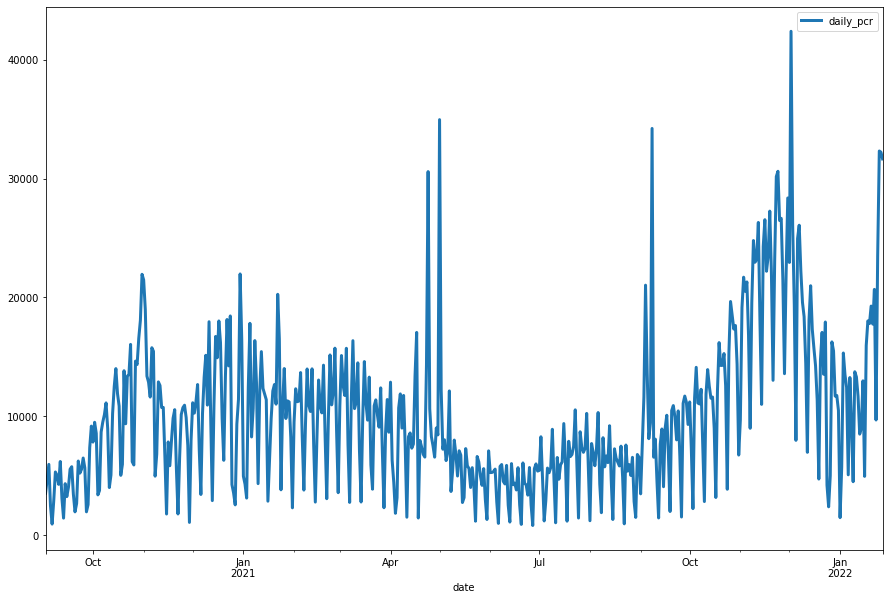

In [4]:
data[data.date > '2020-09-01'].plot(x='date', y='daily_pcr', figsize=(15, 10), linewidth=3)

## Daily positive PCR tests

<AxesSubplot:xlabel='date'>

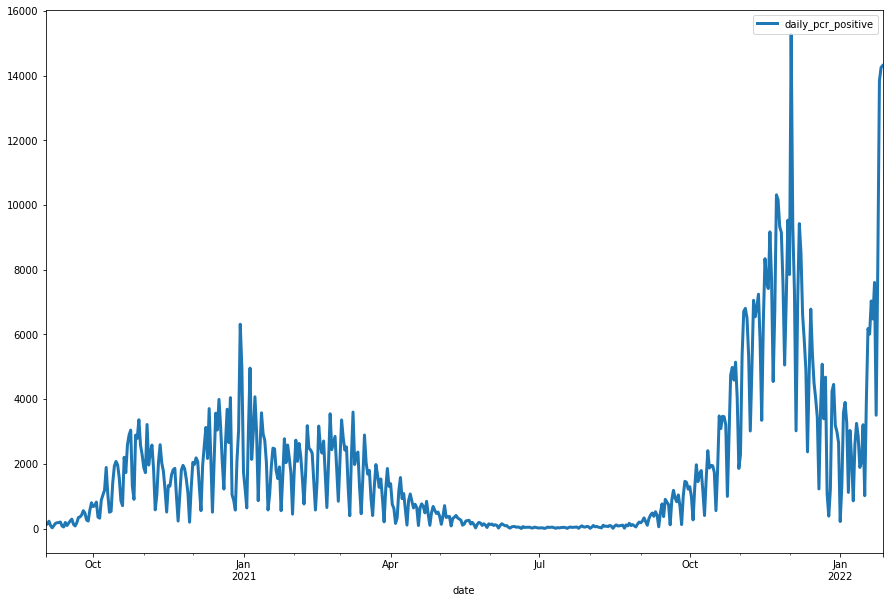

In [5]:
data[data.date > '2020-09-01'].plot(x='date', y='daily_pcr_positive', figsize=(15, 10), linewidth=3)

## Daily positive PCR tests precentage (%)

<AxesSubplot:xlabel='date'>

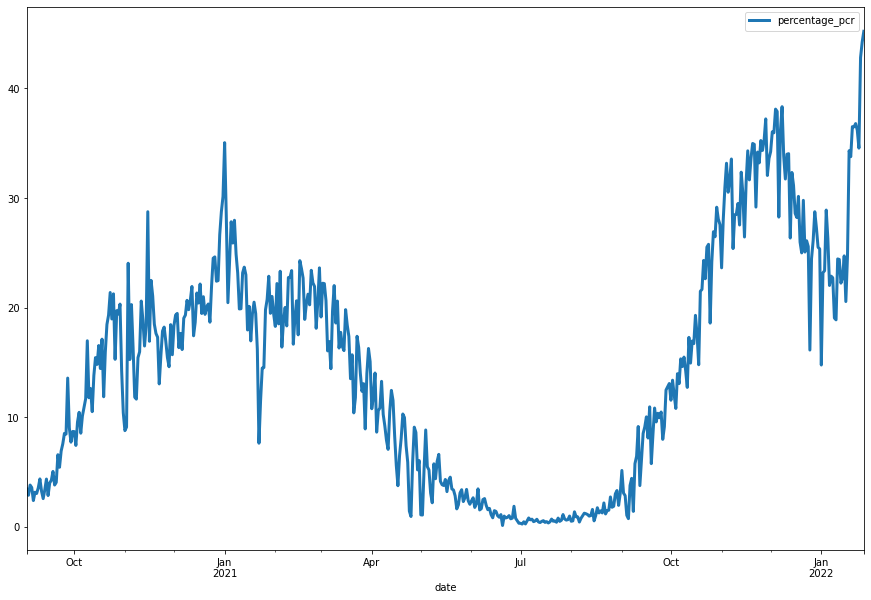

In [6]:
data[data.date > '2020-09-01'].plot(x='date', y='percentage_pcr', figsize=(15, 10), linewidth=3)

## Daily deaths

<AxesSubplot:xlabel='date'>

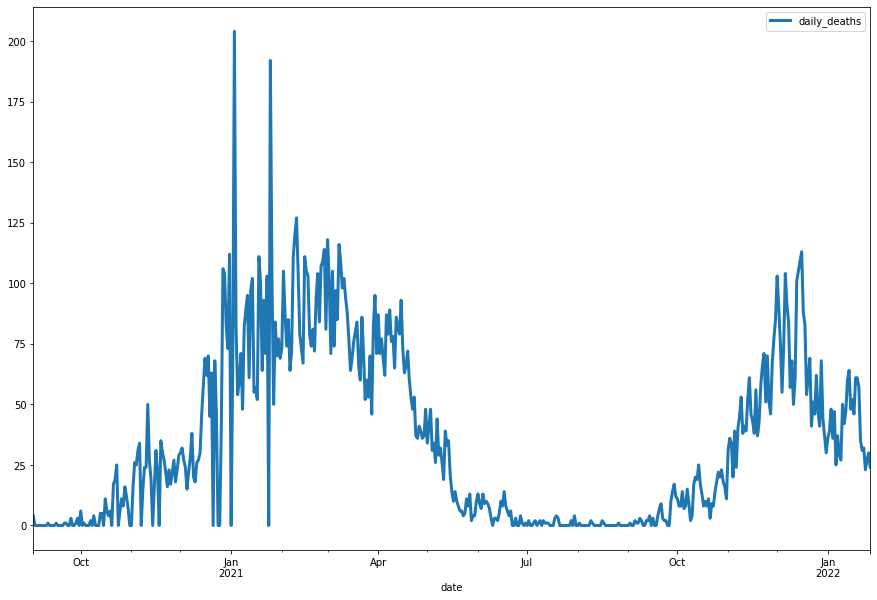

In [7]:
data[data.date > '2020-09-01'].plot(x='date', y='daily_deaths', figsize=(15, 10), linewidth=3)

## 7-day rolling average of daily positive PCR tests

<AxesSubplot:xlabel='date'>

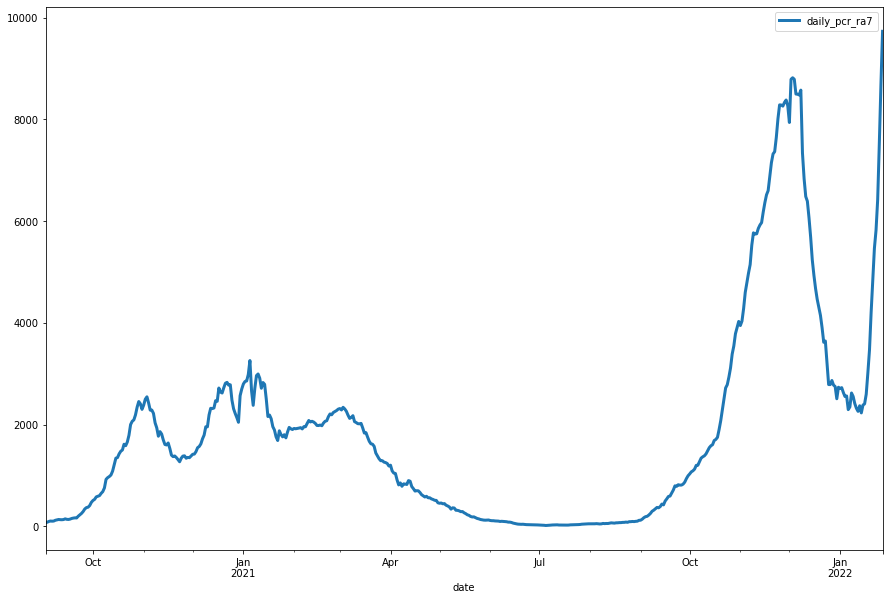

In [8]:
data[data.date > '2020-09-01'].plot(x='date', y='daily_pcr_ra7', figsize=(15, 10), linewidth=3)

## 7-day rolling average of daily positive PCR tests percentage (%)

<AxesSubplot:xlabel='date'>

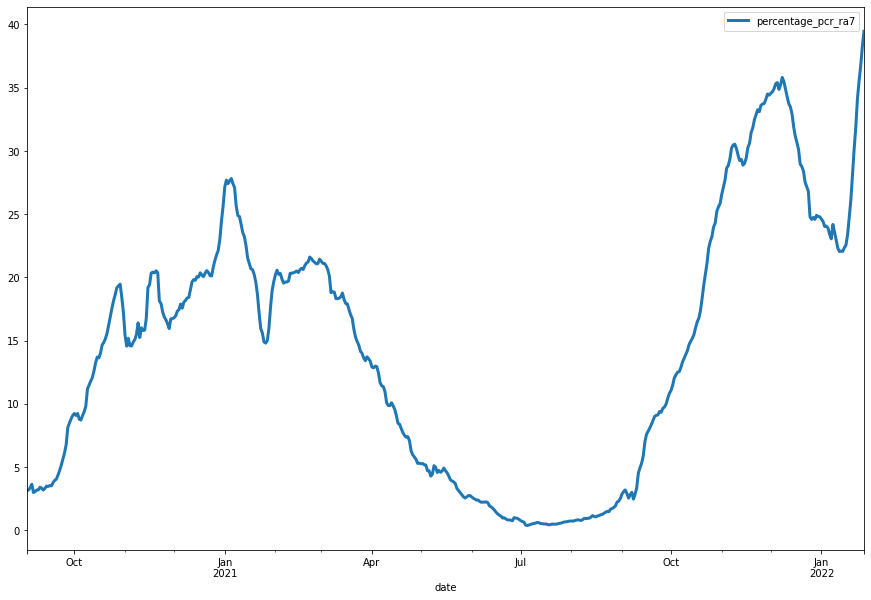

In [9]:
data[data.date > '2020-09-01'].plot(x='date', y='percentage_pcr_ra7', figsize=(15, 10), linewidth=3)

## Total positive PCR tests

<AxesSubplot:xlabel='date'>

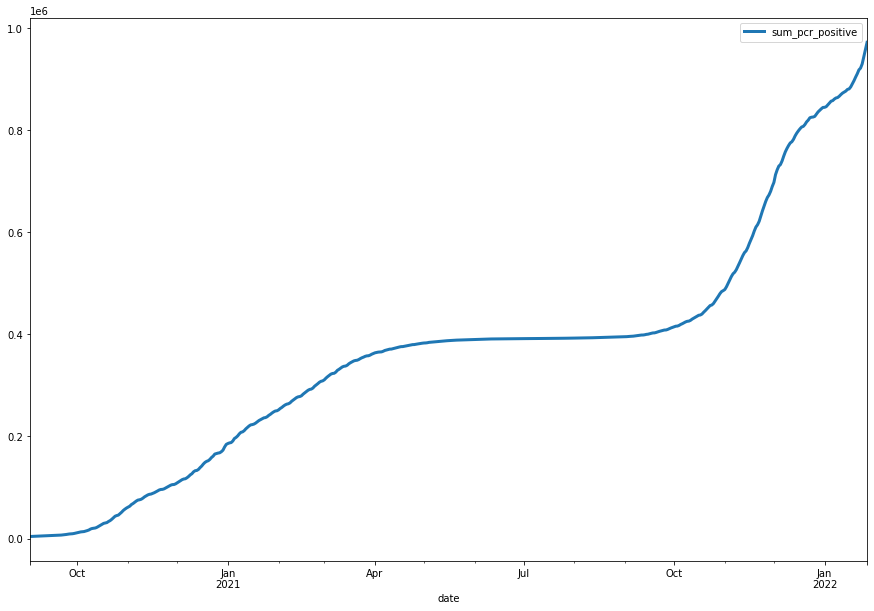

In [10]:
data[data.date > '2020-09-01'].plot(x='date', y='sum_pcr_positive', figsize=(15, 10), linewidth=3)

## 7-day rolling average of positive PCR tests change (slope)

<AxesSubplot:xlabel='date'>

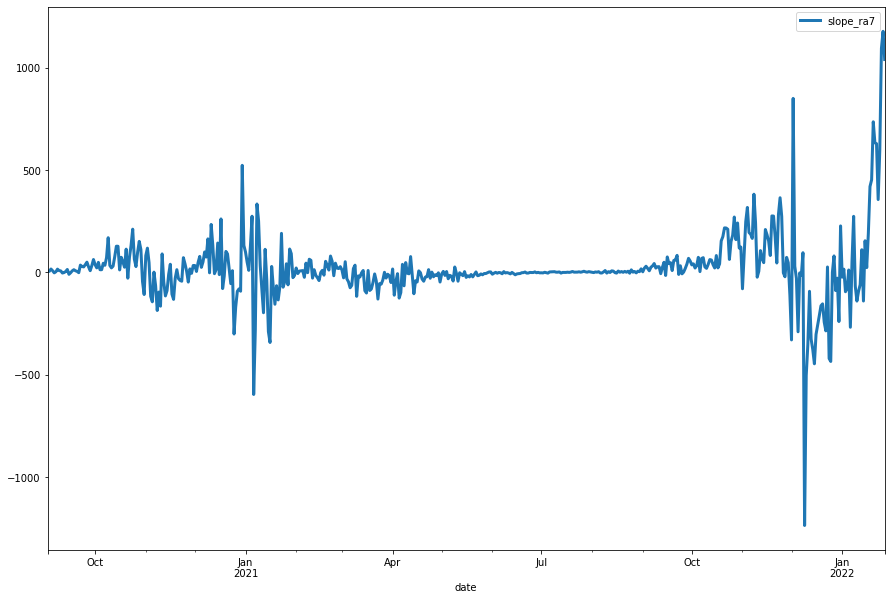

In [11]:
data[data.date > '2020-09-01'].plot(x='date', y='slope_ra7', figsize=(15, 10), linewidth=3)